In [1]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- 생성된 a 행렬에 SVD를 적용해 U, sigma, Vt를 도출
- SVD 분해는 numpy.linalg.svd에 파라미터로 원본 행렬을 입력하면 U 행렬, sigma 행렬, V 전치행렬을 반환
- sigma 행렬의 경우 행렬의 대각에 위치한 값만 0이 아니고, 그렇지 않은 경우는 모두 0이므로 0이 아닌 값의 경우만 1차원 행렬로 표현됨

In [2]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


- U 행렬이 4x4, Vt 행렬이 4x4로 반환됐고, Sigma의 경우는 1차원 행렬인 (4,)로 반환
- 분해된 이 U, Sigma, Vt를 이용해 다시 원본 행렬로 정확히 복원되는지 확인해보자
- 원본 행렬로의 복원은 U, Sigma, Vt를 내적
    - 한 가지 유의할 것은 Sigma의 경우 0이 아닌 값만 1차원으로 추출됐으므로 다시 0을 포함한 대칭행렬로 변환한 뒤에 내적을 수행해야 한다느 점

In [4]:
# Sigma를 다시 0이 포함된 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- 원본 행렬 a와 동일하게 복원됨을 알 수 있음
- 이번에는 데이터 세트가 로우 간 의존성이 있을 경우 어떻게 Sigma 값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아보자
- 일부러 의존성을 부여하기 위해 a 행렬의 3번째 로우를 '첫 번째 로우 + 두 번째 로우'로 업데이트하고, 4번째 로우는 첫 번째 로우와 같다고 업데이트하자

In [5]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3)) # 이전과 다르게 로우 간 관계가 매우 높아졌음

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [7]:
# 다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


- 이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변했음
- 즉, 선형 독립인 로우 벡터의 개수가 2개라는 의미(즉, 행렬의 rank=2)
- 다시 원본 행렬로 복원
- **Reduced SVD** - 이번엔 U, Sigma, Vt의 전체 데이터를 이용하지 않고 Sigma의 0에 대응되는 U, Sigma, Vt이 데이터를 제외하고 복원
    - 즉, Sigma의 경우 앞의 2개 요소만 0이 아니므로 U 행렬 중 선행 두 개의 열만 추출하고, Vt의 경우는 선행 두 개의 행만 추출해 복원하는 것

In [8]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])

# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


- **Truncated SVD**를 이용해 행렬 분해
- Truncated SVD는 sigma 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식
- 인위적으로 더 작은 차원의 U, sigma, Vt로 분해하기 때문에 원본 행렬을 정확하게 다시 복원할 순 없음
- 하지만 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사 가능
    - 원래 차원의 개수에 가깝게 잘라낼수록(Truncate) 원본 행렬에 더 가깝게 복원 가능

In [11]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원: ', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬: ', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원: ', U_tr.shape, Simga_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬: ', Simga_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of Truncated SVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원:  (6, 6) (6,) (6, 6)

Sigma값 행렬:  [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원:  (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬:  [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673

# 사이킷런 TruncatedSVD 클래스를 이용한 변환

- 사이킷런 TruncatedSVD 클래스는 사이파이의 svds와 같이 Truncated SVD 연산을 수행해 원복 행렬을 분해한 U, Sigma, Vt 행렬을 반환하지 않음
- 사이킷런의 TruncatedSVD 클래스는 PCA 클래스와 유사하게 fit()와 transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트(즉, Truncated SVD의 K 컴포넌트 수)로 차원을 축소해 변환
- 원본 데이터를 Truncated SVD 방식으로 분해된 U* Sigma 행렬에 선형 변환해 생성

Text(0, 0.5, 'PCA Component 2')

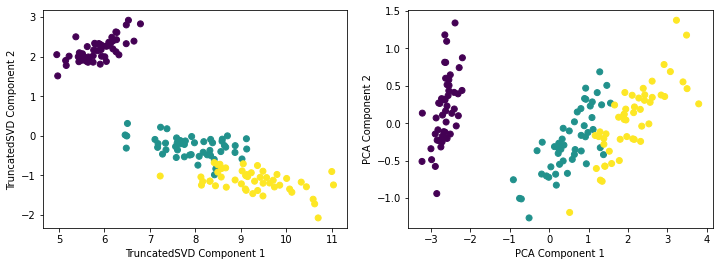

In [20]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 컴포넌트로 TruncatedSVD, PCA 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

pca = PCA(n_components=2)
pca.fit(iris_ftrs)
iris_pca = pca.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터와 PCA 변환된 데이터 표현. 품종은 색깔로 구분
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.subplot(1,2,2)
plt.scatter(x=iris_pca[:, 0], y=iris_pca[:,1], c=iris.target)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

- TruncatedSVD 변환 역시 PCA와 유사하게 변환 후에 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음을 알 수 있음
- 사이킷런의 TruncatedSVD와 PCA 클래스 구현을 조금 더 자세히 들여다보면 두 개 클래스 모두 SVD를 이용해 행렬을 분해
- 붓꽃 데이터를 스케일링으로 변환한 뒤에 TruncatedSVD와 PCA 클래스 변환을 해보면 두 개가 거의 동일함을 알 수 있음

Text(0.5, 1.0, 'PCA Transformed')

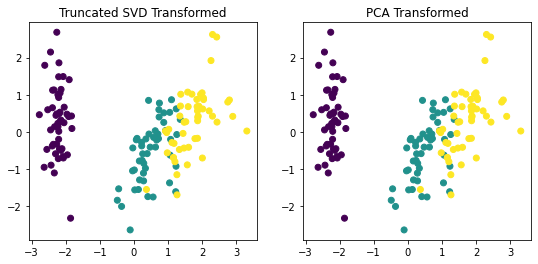

In [21]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [24]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.335325220241084e-15
3.469446951953614e-17


- 모두 0에 가까운 값이므로 2개의 변환이 서로 동일함을 알 수 있음
- 즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행
    - 이는 PCA가 SVD 알고리즘으로 구현됐음을 의미
    - **하지만 PCA는 밀집 행렬에 대한 변환만 가능하며, SVD는 희소 행렬에 대한 변환도 가능**
- SVD는 PCA와 유사하게 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용됨
- 또한 텍스트 토픽 모델링 기법인 LSA(Latent Sementic Analysis)의 기반 알고리즘임